<a href="https://colab.research.google.com/github/MartinVIllesca/Ramos-Redes/blob/master/CC7221/tarea2/tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# cargar dataset
!unzip './drive/My Drive/dataCC7221/tarea2/orand-car-with-bbs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: orand-car-with-bbs/training/images/0198_1148918_202446.png  
  inflating: orand-car-with-bbs/training/images/0489_5207294_228320.png  
  inflating: orand-car-with-bbs/training/images/0045_0372889_287060.png  
  inflating: orand-car-with-bbs/training/images/0332_6254282_116068.png  
  inflating: orand-car-with-bbs/training/images/0963_3801246_497131.png  
  inflating: orand-car-with-bbs/training/images/0910_2309994_216000.png  
  inflating: orand-car-with-bbs/training/images/0136_1965273_239100.png  
  inflating: orand-car-with-bbs/training/images/0711_0053757_114240.png  
  inflating: orand-car-with-bbs/training/images/0185_0508987_129472.png  
  inflating: orand-car-with-bbs/training/images/0543_0689066_262000.png  
  inflating: orand-car-with-bbs/training/images/0103_0189763_322800.png  
  inflating: orand-car-with-bbs/training/images/0300_0541996_170850.png  
  inflating: orand-car-with-bbs/training/images/0356_1386777_

In [2]:
# visualizacion de algunas imagenes
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as patches
import csv
import urllib


In [115]:
def viewImageWAnnotations(path_im, annotations, axs):
  # print(img_path, annotations)
  img = read_image_bgr(path_im)
  img = preprocess_image(img)

  axs.imshow(img)
  for annot in annotations:
    rect = patches.Rectangle((annot[1],annot[2]),annot[3],annot[4],linewidth=1,edgecolor='r',facecolor='none')
    axs.add_patch(rect)
  # axs.set_title(annotations)
  return img

def getAnnotation(path_annot):
  annotation = []
  path_annot = path_annot.split('.')[0] + '.txt'

  try:
    with open(path_annot) as file:
      lines = [line.strip() for line in file]
      _lines = [tuple(line.rstrip().split(':')) for line in lines]
      annotation.append([[int(l[0].strip())] + [int(j.strip()) for j in l[1].split(',')] for l in _lines])
    return annotation[0]
  except Exception as e:
    print(e)
    return []

In [4]:
dir_path = 'orand-car-with-bbs/'
training_path = os.path.join(dir_path, 'training/')
training_images = os.path.join(training_path, 'images/')
training_annotations = os.path.join(training_path, 'annotations/')

images_path = [f for f in os.listdir(training_images) if os.path.isfile(os.path.join(training_images, f))]
annotations = [getAnnotation(os.path.join(training_annotations, path_img)) for path_img in images_path]


[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_4917030_4999.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_273287_7246.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_4917030_5000.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_4174402_83090.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_5507332_2171.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_5023998_10665.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_4542509_11304.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_3699773_17791.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_7676220_67.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_4094573_12198.txt

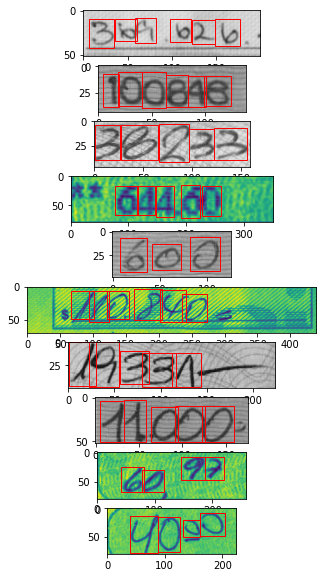

In [5]:
# visualizacion de algunas imagenes
fig, axs = plt.subplots(10, 1, figsize=(10,10))
for i, img_path in enumerate(images_path[:10]):
  img_path = os.path.join(training_images, img_path)
  annot = annotations[i]
  viewImageWAnnotations(img_path, annot, axs[i])

In [6]:
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

In [7]:
annotations2write = []
classes2write = set([])

for i, img_path in enumerate(images_path):
  img_path = os.path.join(training_images, img_path)
  annot = annotations[i]
  if len(annot) > 0:
    for a in annot:
      x1 = a[1]
      y1 = a[2]
      x2 = x1 + a[3]
      y2 = y1 + a[4]
      annotations2write.append([img_path, x1, y1, x2, y2, a[0]])
      classes2write.add('{}'.format(a[0]))

print(len(annotations2write))
print(len(classes2write))

with open(ANNOTATIONS_FILE, 'w') as f:
  writer = csv.writer(f)
  writer.writerows(annotations2write)

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(classes2write):
    f.write('{},{}\n'.format(i,i))

31492
10


In [8]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 5862, done.
remote: Total 5862 (delta 0), reused 0 (delta 0), pack-reused 5862
Receiving objects: 100% (5862/5862), 13.40 MiB | 25.46 MiB/s, done.
Resolving deltas: 100% (3948/3948), done.


In [9]:
%cd keras-retinanet/

!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170796 sha256=2f2ad3f8ccd6660591a457a6c15e6ae46bbb1ac9bc9e9c9da1457049ff7d08d5
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=02dcb0a01072d56f8e64f5754379fdf61f7e1432afbf9e9fb9fc4e8e66ab0711
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


In [10]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_over

In [11]:
!pwd
%cd ..

/content/keras-retinanet
/content


In [133]:
PRETRAINED_MODEL = './keras-retinanet/snapshots/_pretrained_model.h5'

# URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet101_oid_v1.0.0.h5'
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./keras-retinanet/snapshots/_pretrained_model.h5


In [ ]:
!keras-retinanet/keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 8 --steps 500 --epochs 10 csv annotations.csv classes.csv

Using TensorFlow backend.
2020-07-16 02:03:46.424509: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Creating model, this may take a second...
2020-07-16 02:03:49.241015: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-16 02:03:49.244379: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-16 02:03:49.244847: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-07-16 02:03:49.244891: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
20

In [28]:
%cp ./snapshots/resnet50_csv_10.h5 ./drive/My\ Drive/dataCC7221/tarea2/

In [29]:
import matplotlib as mp
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import cv2
from tqdm import tqdm
import os
import random
import numpy as np
import matplotlib.pyplot as plt


In [94]:
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image


In [131]:

model = models.load_model('./snapshots/resnet50_csv_03.h5', backbone_name='resnet101')
model = models.convert_model(model)

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


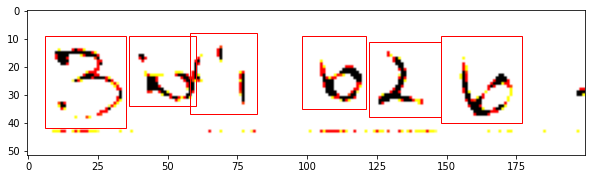

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]
[]


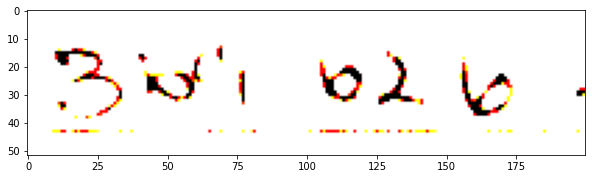

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


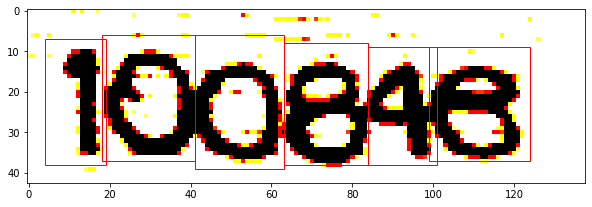

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.3011969]
[0]


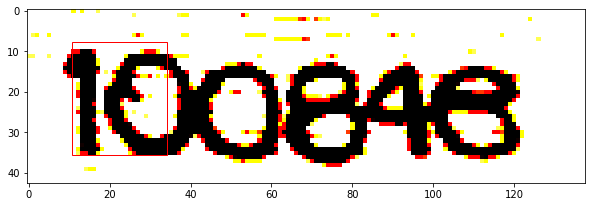

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


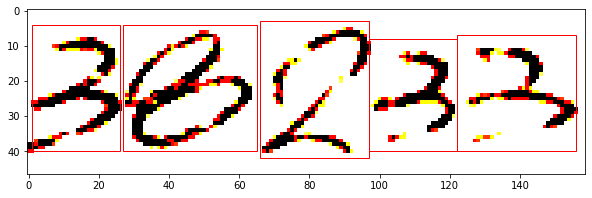

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.3448644  0.3394897  0.33264726 0.3165061  0.3146437  0.31403744
 0.31349972 0.30198032]
[0 0 0 0 0 0 0 0]


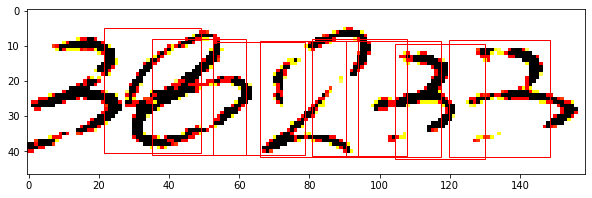

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


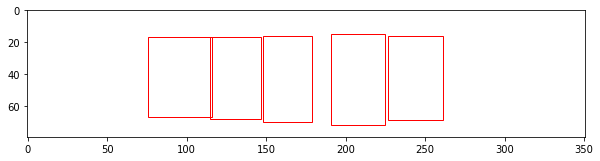

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]
[]


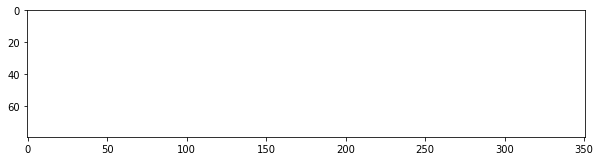

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


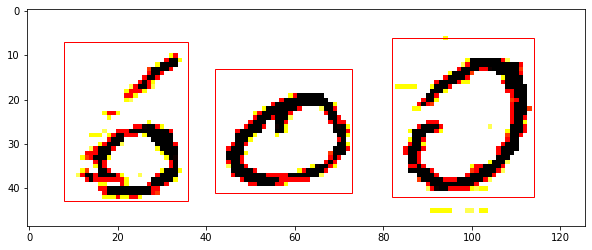

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]
[]


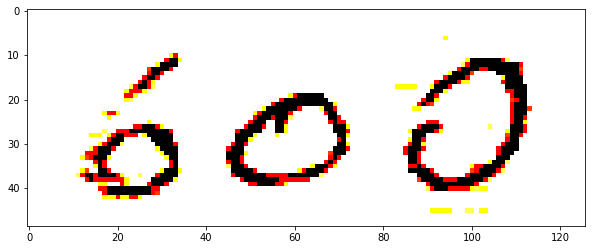

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


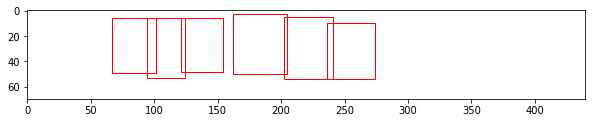

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]
[]


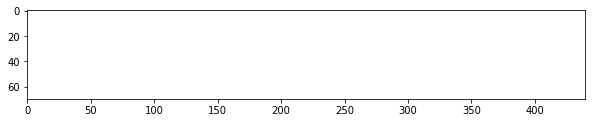

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


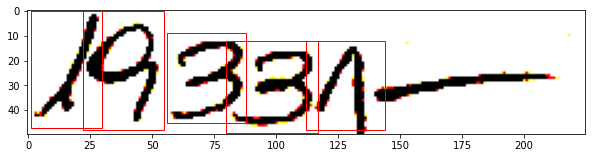

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.38655105 0.35065246 0.33292735 0.33062515 0.31950533 0.3155597
 0.3116482  0.311429   0.30790338 0.3008083 ]
[0 0 0 0 0 0 0 0 0 0]


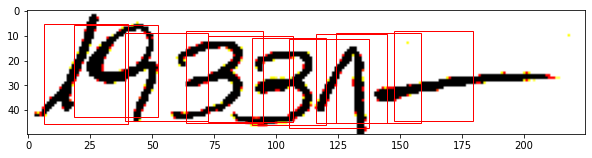

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


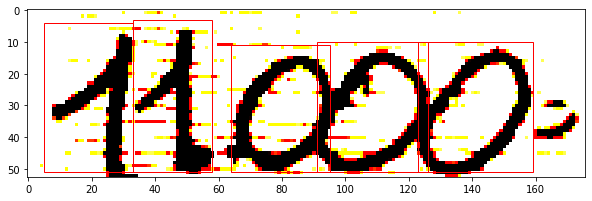

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.3151514  0.30102348]
[0 0]


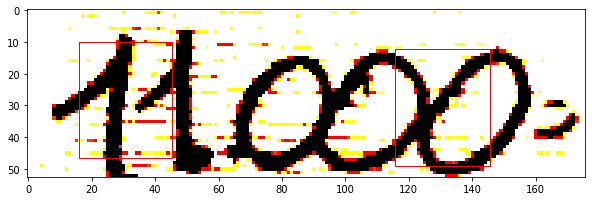

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


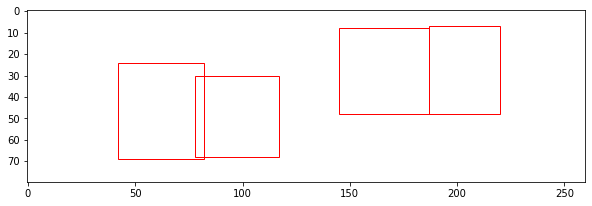

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]
[]


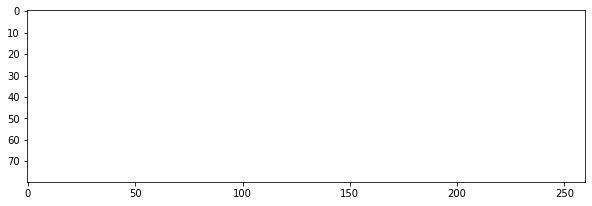

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


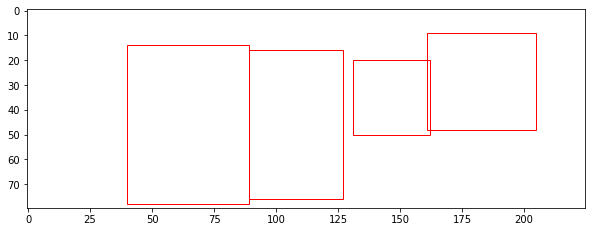

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]
[]


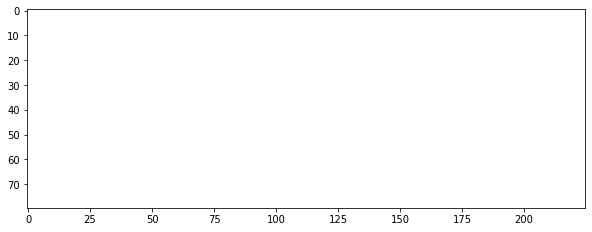

In [132]:
umbral = 0.3

for i, img_path in enumerate(images_path[:10]):
  img_path = os.path.join(training_images, img_path)
  annot = annotations[i]
  fig, axs = plt.subplots(1, 1, figsize=(10,10))
  image = viewImageWAnnotations(img_path, annot, axs)
  plt.show()

  try:
    if image.shape[2] != 3: break
  except Exception as e:
    print(e)
    continue

  image = read_image_bgr(img_path)
  fig, axs = plt.subplots(1,1, figsize=(10,10))
  image = preprocess_image(image)
  axs.imshow(image)  
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict(np.expand_dims(image, axis=0))
  boxes /= scale
  boxes = boxes[0]
  scores = scores[0]
  labels = labels[0]
  # print(scores)
  for i, box in enumerate(boxes):
    if scores[i] > umbral:
      rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=1,edgecolor='r',facecolor='none')
      axs.add_patch(rect)
  print(scores[np.where(scores > umbral)[0]])
  print(labels[np.where(scores > umbral)[0]])
  plt.show()
  # print(np.where(scores > umbral)[0])